In [1]:
import pandas as pd
import numpy as np



datasize = 60000
tpath = "GDB17.csv"
data0 = pd.read_csv(tpath)
data = data0.iloc[np.random.permutation(len(data0))] #randomly shuffles rows
data = data.iloc[:datasize]



print(len(data))
data.head()

60000


Smiles
10459216       CCNCC1(CCC#C)OC(C)(C)CCC1=O
7776428   CC(C)CC1N(C(=O)C#N)C(=N)OCC1(C)N
6839455        CCCC1CCC(C(CNC)C=O)C(=O)CC1
1107155    CC1=CC2(CC3CCC2(O)C3)OCC(C1)=NO
4759728       CCC1=CC2=C(OC1=NC)C1CC2CCCO1

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import natsort
import pickle

In [4]:
n = 0
n_max = 5 #len(data)

y = []
gimg_list = []

while n < n_max:
    
    smi = data.iloc[n,0]

    size = (56,56)
    ipath = "ESOL_img/" + str(n) + ".png"

    mol = Chem.MolFromSmiles(smi)

    Draw.MolToImageFile(mol,ipath,size = size)
    Mw = round(rdMolDescriptors.CalcExactMolWt(mol),3)
    y.append(Mw)
    
    filename = natsort.natsorted(glob.glob("ESOL_img/*.png"))
    
    img_list = [cv2.imread(file) for file in filename]
    
    for img in img_list:
        gimg_list.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        
    
    for f in filename:
        os.remove(f)
    
    n += 1
    print(n)

1
2
3
4
5


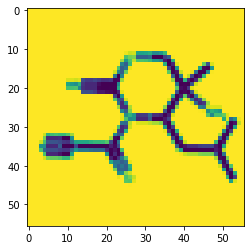

238.143


In [5]:
t=1

plt.imshow(gimg_list[t]/255)
plt.show()

print(y[t])

In [25]:
gimg_array = (np.array(gimg_list)/255)

X_full = gimg_array.reshape(-1, size[0], size[1],1)
y_full = np.array(y)

s = 0.8  #size in percent of training data from full data
train_size =round(len(X_full)*s)


X_train = X_full[:train_size]
X_test = X_full[train_size:]
y_train = y_full[:train_size]
y_test = y_full[train_size:]


print("X_train:",len(X_train),X_train.shape)
print("X_test:",len(X_test),X_test.shape)
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 72000 (72000, 56, 56, 3)
X_test: 8000 (8000, 56, 56, 3)
y_train: 72000
y_test: 8000


## Save the Data as pickles

In [26]:
pickle_out = open('X_train_ESOL_random_56x56.pickle', 'wb')
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open('y_train_ESOL_random_56x56.pickle', 'wb')
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open('X_test_ESOL_random_56x56.pickle', 'wb')
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open('y_test_ESOL_random_56x56.pickle', 'wb')
pickle.dump(y_test, pickle_out)
pickle_out.close()

OverflowError: cannot serialize a bytes object larger than 4 GiB

## Load the Data as pickles

In [21]:
pickle_in = open('y_train_56x56.pickle','rb')

y_train = pickle.load(pickle_in)

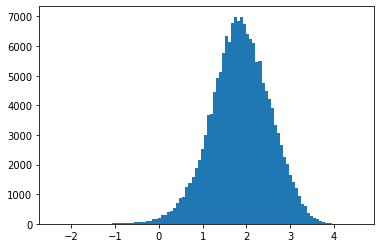

-2.383

In [28]:
plt.hist(y_train, bins = 100)
plt.show()